<a href="https://colab.research.google.com/github/leoafs/DIP/blob/main/createImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
height = 100
width = 100
n = 100
x = np.linspace(-height//2, height//2, n)
y = np.linspace(-width//2, width//2, n)
xx, yy = np.meshgrid(x, y)

 **Create the image of a paraboloid with one axis scaled (like an oval paraboloid)**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


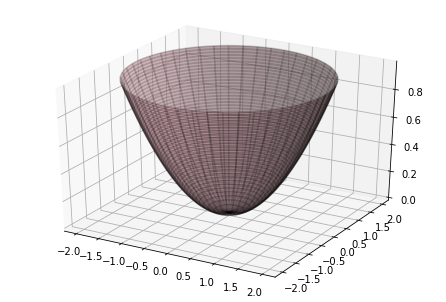

In [ ]:
theta=np.arange(0,2*np.pi, 0.02)

z_=np.arange(0,1,0.02)
theta,z_=np.meshgrid(theta,z_)
z=z_
r=np.sqrt(4*z)
x=r*np.cos(theta)
y= r*np.sin(theta)

fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(x,y,z,color='pink',alpha=0.6)
ax.plot_wireframe(x,y,z, color='black',alpha=0.2)
plt.show()

**Create the image of a rotated sin using rotation of coordinates.**

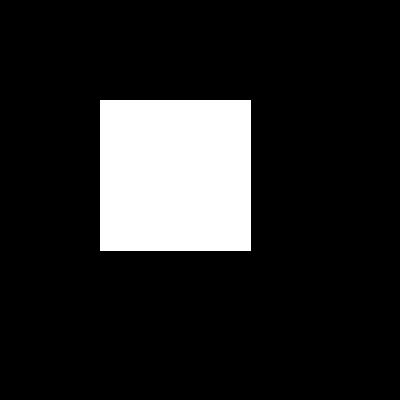

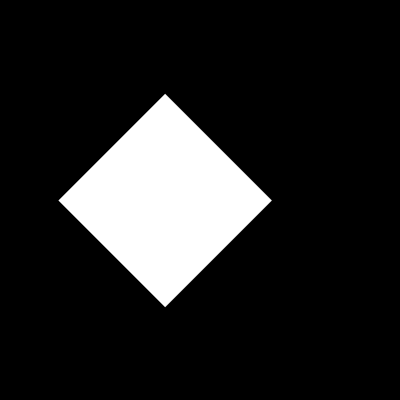

In [ ]:
image1 = np.zeros((400, 400), dtype="uint8")

cv2.rectangle(image1, (100, 100), (250, 250), 255, -1)

cv2_imshow(image1)

# pegue as dimensões da imagem e calcule o centro do
# imagem
(h, w) = image1.shape[0:2]
(cX, cY) = (w // 2, h // 2)
# girar nossa imagem em 45 graus em torno do centro da imagem
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image1, M, (w, h))
cv2_imshow( rotated)

**Create the image of a gaussian**

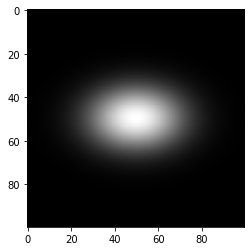

In [ ]:
#Argumentos da Gaussiana
#a = 1
#b = 0 #Desloca os pixels brancas horizontalmente, em 0 está centralizado
#c = 20 #Define a "largura" da região de pixels brancos
#img = a*np.exp(-(xx-b)**2/(2*(c**2)))

A = 50 #Amplitude
x0 = mx = 0 # Média X - Desloca em X
y0 = my = 0 # Média Y - Desloca em Y
sx = 15 # Desvio Padrão em X
sy = 10 # Desvio Padrão em Y

img = A*np.exp(-(((xx-x0)**2/(2*(sx**2)))+((yy-y0)**2/(2*(sy**2)))))

plt.imshow(img, cmap = "gray")
plt.show()

**Create a function that generates the image of a Gaussian optionally rotate by an angle \theta and with mx, my, sx, sy as input arguments.**

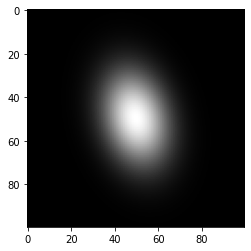

In [ ]:
def converte(a):
  return a*np.pi/180
teta = 75 #Definir grau de rotação
teta = converte(teta)
def Gaussian(teta, A, x0, y0, sx, sy):
 global xx, yy
 Xr = np.cos(teta)*xx + np.sin(teta)*yy
 Yr = -np.sin(teta)*xx + np.cos(teta)*yy
 xx = Xr
 yy = Yr
 aux = A*np.exp(-(((xx-x0)**2/(2*(sx**2)))+((yy-y0)**2/(2*
(sy**2)))))
 return aux
A = 50 #Amplitude
x0 = mx = 0 # Média X - Desloca em X
y0 = my = 0 # Média Y - Desloca em Y
sx = 15 # Desvio Padrão em X
sy = 10 # Desvio Padrão em Y
img = Gaussian(teta, A, x0, y0, sx, sy)
plt.imshow(img, cmap = "gray")
plt.show()